# Project 1 (E-commerce Analysis)

This notebook demonstrates the early stages of an end to end data science workflow on an e-commerce transaction dataset:
1) Data understanding
2) Data preparation
3) Feature engineering

## Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy import stats

## Importing DataFrame

In [6]:
data = pd.read_csv('data.csv', encoding='latin1')

In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Check for Datatypes

In [8]:
data.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [9]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [10]:
data.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


Summary:

* The dtype of InvoiceDate should be changed from object to DateTime
* The CustomerID is unique to a customer, so I can't consider them as float64, so changed them as object.

In [11]:
data = data.astype({'CustomerID':object})

In [12]:
data.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


## Check for missing values

In [13]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [14]:
# Step 1: Calculate the most frequent description for each stockcode
grouped_description = data.groupby('StockCode')['Description'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

# Step 2: Create a mapping dictionary with NaN values handled as well
mapping_dict = dict(zip(grouped_description['StockCode'], grouped_description['Description']))

# Step 3: Fill missing descriptions based on the mapping dictionary
data['Description'] = data['StockCode'].map(mapping_dict).combine_first(data['Description'])

In [15]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [16]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [17]:
data[data['CustomerID']==17850.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
86898,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850.0,United Kingdom
86899,C543611,21874,GIN AND TONIC MUG,-1,2011-02-10 14:38:00,1.06,17850.0,United Kingdom
86900,C543611,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,-2,2011-02-10 14:38:00,2.75,17850.0,United Kingdom
86901,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850.0,United Kingdom


In [18]:
135080/len(data)


0.249266943342886

In [19]:
1454/len(data)

0.002683107311375157

In [20]:
112/len(data)

0.00020667676676342338

In [21]:
data.dropna(subset=['Description'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [22]:
data.fillna('Unknown')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [23]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Summary:

* The percentage of missing value in CustomerID is more than 24.9%.
* Since CustomerID cannot be filled using imputation methods I am going to drop the columns.
* The percentage of missing values in Description is less than 2% I have to impute the values.
* The values are filled based on the relation between stockcode and description.
* After imputing there are few values which were not filled because there are no decription for the specific stockcode. Since there are only 0.2% I can drop those columns.

## Checking for Duplicate values

In [24]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [25]:
data.drop_duplicates(keep='last', inplace=True)

In [26]:
len(data)

536639

In [27]:
data.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,object
Country,object


In [28]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Summary:

* Removed duplicate values from the dataframe.
* The reason why I used keep values as last is because maybe there maybe a change in the order so I can take the last duplicate value as the actual value.

## Checking reason for negative quantity and price

In [29]:
data[data['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [30]:
data = data[data['UnitPrice']>=0]

In [31]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [32]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Checking if the negative quantity is caused due to order cancellation or return

In [33]:
one_order = data[data['InvoiceNo']=='C581490']

In [34]:
one_order

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom


Individual order, so is not considered as return of items

In [35]:
data['Quantity'] = data['Quantity'].apply(abs)

/tmp/ipython-input-2363584303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quantity'] = data['Quantity'].apply(abs)


Summary:
* The special stockcode means
    - B - Bad Debt
* Bad Debt is the only negative unit price in the dataset and can be considered as a debt.
This should be removed from the dataset as it may cause distraction
* The reason for negative quantities can be explained by only
    - Error during data entry
    - While checking if the negative sign maybe the cause of return, it turns out its not.
* So converted the sign in quantity column




## Feature Extraction

In [36]:
data['Time'] = data['InvoiceDate'].dt.time
data['Month'] = data['InvoiceDate'].dt.month_name()
data['Day'] = data['InvoiceDate'].dt.day_name()
data['Year']= data['InvoiceDate'].dt.year
data = data.drop('InvoiceDate', axis=1)

/tmp/ipython-input-709550967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] = data['InvoiceDate'].dt.time
/tmp/ipython-input-709550967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['InvoiceDate'].dt.month_name()
/tmp/ipython-input-709550967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [37]:
data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Month,Day,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,08:26:00,December,Wednesday,2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,08:26:00,December,Wednesday,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,12:50:00,December,Friday,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12:50:00,December,Friday,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,12:50:00,December,Friday,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,12:50:00,December,Friday,2011


In [38]:
data['Amount'] = data['Quantity']*data['UnitPrice']

In [39]:
data.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
UnitPrice,float64
CustomerID,object
Country,object
Time,object
Month,object
Day,object


## Data Visualisations and Getting Insights

<Axes: xlabel='Amount'>

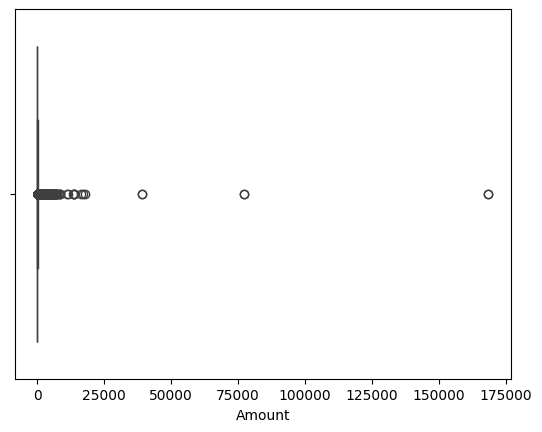

In [40]:
sns.boxplot(x=data['Amount'])

Most of the order total is in between 0 to 25000. But there are few orders more than 30000.
Let's check what these orders are

In [41]:
data[data['Amount']>=30000]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Amount
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,12346.0,United Kingdom,10:01:00,January,Tuesday,2011,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,12346.0,United Kingdom,10:17:00,January,Tuesday,2011,77183.6
222680,556444,22502,PICNIC BASKET WICKER SMALL,60,649.50,15098.0,United Kingdom,15:28:00,June,Friday,2011,38970.0
222681,C556445,M,Manual,1,38970.00,15098.0,United Kingdom,15:31:00,June,Friday,2011,38970.0
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,United Kingdom,09:15:00,December,Friday,2011,168469.6
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,United Kingdom,09:27:00,December,Friday,2011,168469.6


These orders are bulk order of the same item and by 3 customers. So need not consider it as outliers.


In [42]:
products = data.groupby('StockCode').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'CustomerID': 'nunique',
    'Country': 'first'
})

In [43]:
products = products.sort_values(by='Quantity', ascending=False)
products

,Quantity,UnitPrice,CustomerID,Country
StockCode,,,,
23843,161990,2.080000,1,United Kingdom
23166,152527,1.456846,138,United Kingdom
22197,57369,1.035634,407,United Kingdom
84077,56151,0.319963,307,United Kingdom
85099B,49490,2.470965,636,United Kingdom
...,...,...,...,...
84664,1,0.000000,0,United Kingdom
84661a,1,4.960000,0,United Kingdom
DCGS0074,1,0.000000,0,United Kingdom


By above dataset, I can see that a few customer have ordered the same product in huge quantities. So checking with those customers and providing exclusive offers for them might be helpful.

/tmp/ipython-input-3811160036.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_sales, x='Country', y='Quantity', palette='Set2')


<Figure size 1000x600 with 0 Axes>

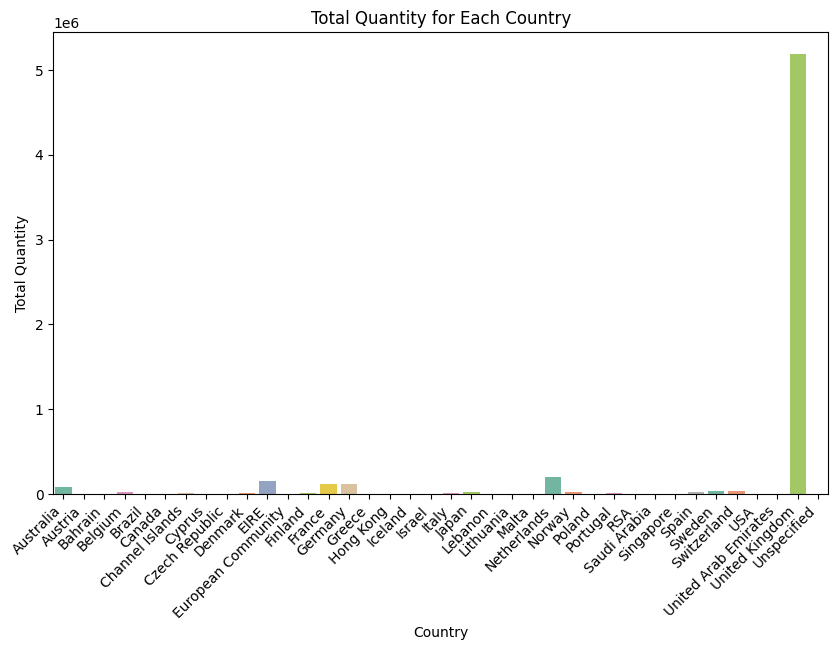

In [44]:
plt.figure(figsize=(10, 6))
country_sales = data.groupby('Country')['Quantity'].sum().reset_index()

# Plot the total quantity for each country
plt.figure(figsize=(10, 6))
sns.barplot(data=country_sales, x='Country', y='Quantity', palette='Set2')
plt.title('Total Quantity for Each Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha="right")
plt.show()

In [45]:
country_sales

,Country,Quantity
0,Australia,84755
1,Austria,4935
2,Bahrain,368
3,Belgium,23322
4,Brazil,356
5,Canada,2763
6,Channel Islands,9497
7,Cyprus,6384
8,Czech Republic,750
9,Denmark,8282


From above graph I can see that since the company is located in UK, most orders are from UK. And there are few orders from other countries. I will look into the countries where the company can take few initiatives to expand their business.

In [46]:
country_sales.sort_values(by = 'Quantity', ascending= False, inplace = True)

Let's see the top 10 countries where the sales are high

/tmp/ipython-input-1241219976.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_sales[:11], x='Country', y='Quantity', palette='Set2')


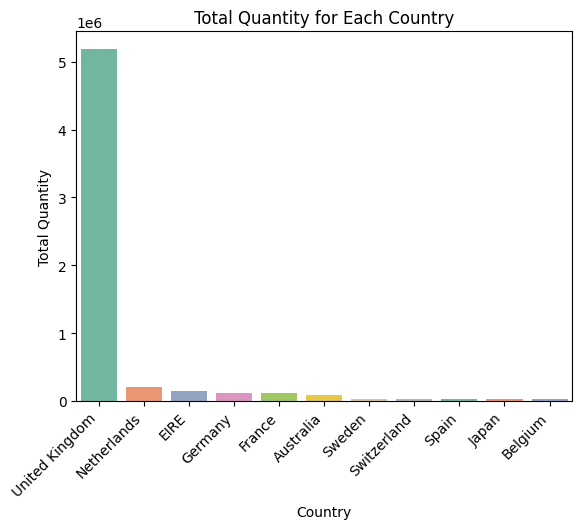

In [47]:
sns.barplot(data=country_sales[:11], x='Country', y='Quantity', palette='Set2')
plt.title('Total Quantity for Each Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha="right")
plt.show()

* Netherlands, EIRE, Germany, France, Australia are having sales more than the remaining countries. So concentrating on such countries for more future sales is recommended.
* The other 6 countries may have higher sales in the future.

In [48]:
bulk_order_customers = data.groupby('CustomerID')['Quantity'].sum().reset_index()
bulk_order_customers.sort_values(by = 'Quantity', ascending= False, inplace = True)
bulk_order_customers

,CustomerID,Quantity
1703,14646.0,198263
3033,16446.0,161992
0,12346.0,148430
1895,14911.0,83825
55,12415.0,78098
...,...,...
2236,15369.0,1
3487,17065.0,1
2802,16138.0,1
4045,17846.0,1


/tmp/ipython-input-261434555.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bulk_order_customers[:20], x='CustomerID', y='Quantity', palette= 'coolwarm')


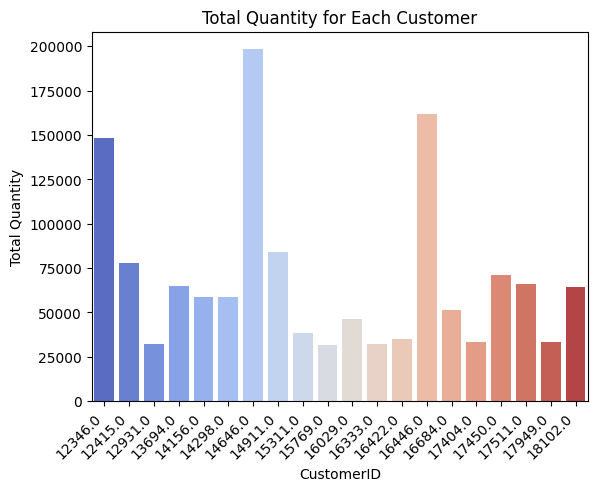

In [49]:
sns.barplot(data=bulk_order_customers[:20], x='CustomerID', y='Quantity', palette= 'coolwarm')
plt.title('Total Quantity for Each Customer')
plt.xlabel('CustomerID')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha="right")
plt.show()

* The above customers are the high quantities ordering customers
* Few customers have ordered more than 100,000 products

In [50]:
sales_per_year = data.groupby(['Year','Month'])['Amount'].sum().reset_index()
sales_per_year['YearMonth'] = pd.to_datetime(sales_per_year['Year'].astype(str) + '-' + sales_per_year['Month'], format='%Y-%B')
sales_per_year = sales_per_year.sort_values('YearMonth')
sales_per_year.drop('YearMonth', axis=1, inplace=True)
sales_per_year

,Year,Month,Amount
0,2010,December,896181.850
5,2011,January,821174.660
4,2011,February,548064.710
8,2011,March,750416.540
1,2011,April,581569.141
9,2011,May,816484.270
7,2011,June,831116.790
6,2011,July,755995.251
2,2011,August,812172.180
12,2011,September,1095273.702


/tmp/ipython-input-3468846706.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_per_year, x = 'Month', y = 'Amount', palette = 'Set2')


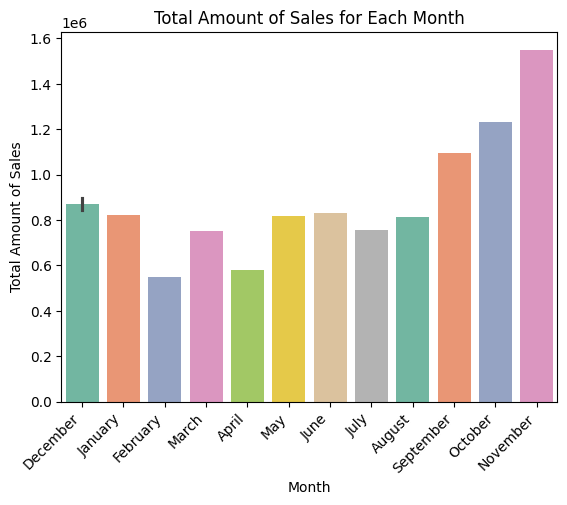

In [51]:
sns.barplot(data = sales_per_year, x = 'Month', y = 'Amount', palette = 'Set2')
plt.title('Total Amount of Sales for Each Month')
plt.xlabel('Month')
plt.ylabel('Total Amount of Sales')
plt.xticks(rotation=45, ha="right")
plt.show()

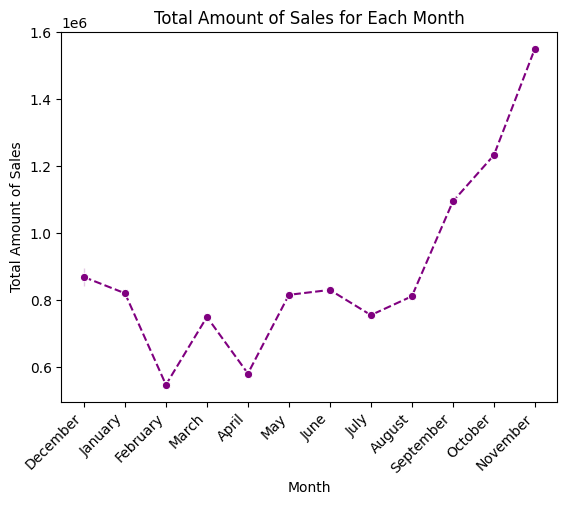

In [52]:
sns.lineplot(data = sales_per_year, x = 'Month', y = 'Amount', marker = 'o', linestyle = '--', color = 'purple')
plt.xlabel('Month')
plt.ylabel('Total Amount of Sales')
plt.title('Total Amount of Sales for Each Month')
plt.xticks(rotation=45, ha="right")
plt.show()

In [53]:
sales_per_year.sort_values(by = 'Amount', ascending = False)

,Year,Month,Amount
10,2011,November,1551050.760
11,2011,October,1233159.230
12,2011,September,1095273.702
0,2010,December,896181.850
3,2011,December,842879.600
7,2011,June,831116.790
5,2011,January,821174.660
9,2011,May,816484.270
2,2011,August,812172.180
6,2011,July,755995.251


* The sales are high during September, October, November, December.
* And there is also increase in sales at the year end and at start.
* The sales in the mid year are normal.

In [54]:
sales_by_day = data.groupby('Day')['Amount'].mean().reset_index()
sales_by_day.sort_values(by = 'Amount', ascending= False, inplace = True)
sales_by_day

,Day,Amount
0,Friday,25.929137
4,Tuesday,23.605808
3,Thursday,22.219799
5,Wednesday,20.952295
1,Monday,20.825635
2,Sunday,12.975197


/tmp/ipython-input-1989588562.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_by_day, x = 'Day', y = 'Amount', palette = 'Set3')


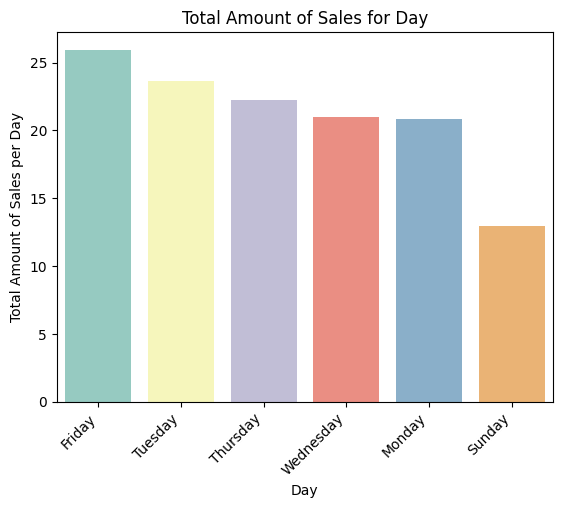

In [55]:
sns.barplot(data = sales_by_day, x = 'Day', y = 'Amount', palette = 'Set3')
plt.title('Total Amount of Sales for Day')
plt.xlabel('Day')
plt.ylabel('Total Amount of Sales per Day')
plt.xticks(rotation=45, ha="right")
plt.show()

* I can see from above graph that high avg sales amount is generated on weekdays and there is less sales on Sunday.
* I can also observe that there is completedly no invoice generated on Saturdays.

In [56]:
orders_per_day = data.groupby('Day')['Quantity'].sum().reset_index()
orders_per_day.sort_values(by = 'Quantity', ascending= False)

,Day,Quantity
3,Thursday,1288808
4,Tuesday,1279289
5,Wednesday,1100668
0,Friday,1045732
1,Monday,943972
2,Sunday,468762


/tmp/ipython-input-225670576.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = orders_per_day, x = 'Day', y = 'Quantity', palette = 'Set3')


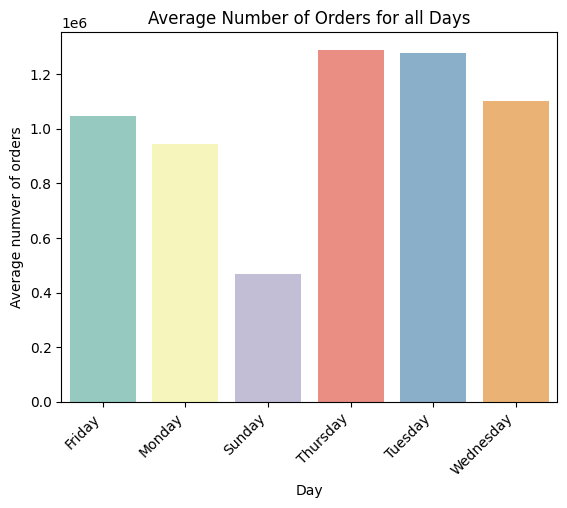

In [57]:
sns.barplot(data = orders_per_day, x = 'Day', y = 'Quantity', palette = 'Set3')
plt.title('Average Number of Orders for all Days')
plt.xlabel('Day')
plt.ylabel('Average numver of orders')
plt.xticks(rotation=45, ha="right")
plt.show()

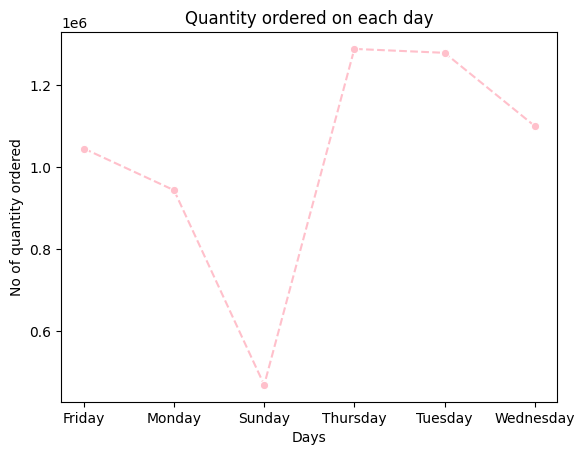

In [58]:
sns.lineplot(data = orders_per_day, x = 'Day', y = 'Quantity', marker = 'o', linestyle = '--', color = 'pink')
plt.xlabel('Days')
plt.ylabel('No of quantity ordered')
plt.title('Quantity ordered on each day')
plt.show()

* Here also I can observe that the average number of orders for weekdays is nearly equal.
* But on saturday there are no orders and on sunday the orders are half than the other days.

In [59]:
frequent_customers = data.groupby(['CustomerID', 'Amount'])['InvoiceNo'].nunique().reset_index()
frequent_customers.sort_values(by = 'InvoiceNo', ascending= False, inplace = True)

In [60]:
frequent_customers[:20]

,CustomerID,Amount,InvoiceNo
63994,14911.0,15.00,145
136775,17841.0,1.25,120
136836,17841.0,3.75,114
136784,17841.0,1.65,112
136816,17841.0,2.95,109
136807,17841.0,2.55,105
63951,14911.0,10.20,104
64014,14911.0,17.70,96
136768,17841.0,0.85,96
64027,14911.0,19.80,96


## Total sales per country

In [61]:
total_sales_per_country = data.groupby('Country')['Amount'].sum().reset_index()
total_sales_per_country.sort_values(by = 'Amount', ascending=False, inplace = True)
total_sales_per_country

,Country,Amount
36,United Kingdom,9813684.034
10,EIRE,303287.660
24,Netherlands,286231.140
14,Germany,235847.330
13,France,221933.630
0,Australia,139897.850
31,Spain,68361.090
33,Switzerland,57772.150
3,Belgium,41481.720
32,Sweden,40150.250


/tmp/ipython-input-3481846496.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = total_sales_per_country[1:10], x = 'Country', y = 'Amount', palette = 'Set2')


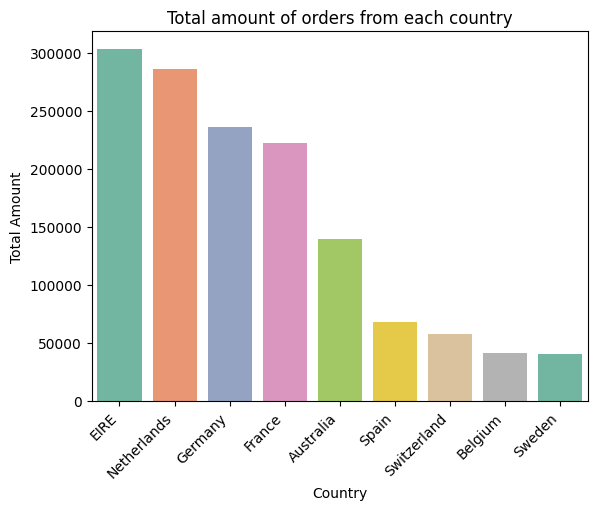

In [62]:
sns.barplot(data = total_sales_per_country[1:10], x = 'Country', y = 'Amount', palette = 'Set2')
plt.title('Total amount of orders from each country')
plt.xlabel('Country')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha="right")
plt.show()

In [63]:
df = data.groupby('CustomerID').agg({'InvoiceNo': 'nunique', 'Amount': 'sum'}).reset_index()
df.sort_values(by = 'InvoiceNo', ascending=False, inplace= True)
df

,CustomerID,InvoiceNo,Amount
1895,14911.0,248,154963.61
330,12748.0,224,37700.82
4042,17841.0,169,41170.63
1674,14606.0,128,12518.95
2192,15311.0,118,61981.31
...,...,...,...
4339,18240.0,1,422.58
27,12378.0,1,4008.62
4355,18262.0,1,149.48
14,12361.0,1,189.90


In [64]:
conditions = [
    (df['InvoiceNo'] > 150),
    (df['InvoiceNo'] <= 150) & (df['InvoiceNo'] >= 50),
    (df['InvoiceNo'] < 50),
]

conditions_1 = [
    (df['Amount'] > 80000),
    (df['Amount'] <= 80000) & (df['Amount']>= 40000),
    (df['Amount'] < 40000)
]
values = ['Highly Frequent', 'Frequent', 'Occasional']
values_1 = ['High', 'Medium', 'Low']

# Create the new column based on the conditions and values
df['Frequency'] = np.select(conditions, values, default='Unknown')
df['PurchaseValue'] = np.select(conditions_1, values_1, default = 'Unknown')
df

,CustomerID,InvoiceNo,Amount,Frequency,PurchaseValue
1895,14911.0,248,154963.61,Highly Frequent,High
330,12748.0,224,37700.82,Highly Frequent,Low
4042,17841.0,169,41170.63,Highly Frequent,Medium
1674,14606.0,128,12518.95,Frequent,Low
2192,15311.0,118,61981.31,Frequent,Medium
...,...,...,...,...,...
4339,18240.0,1,422.58,Occasional,Low
27,12378.0,1,4008.62,Occasional,Low
4355,18262.0,1,149.48,Occasional,Low
14,12361.0,1,189.90,Occasional,Low


In [65]:
df.sort_values(by = 'Amount', ascending= False)

,CustomerID,InvoiceNo,Amount,Frequency,PurchaseValue
3033,16446.0,3,336942.10,Occasional,High
1703,14646.0,77,280923.02,Frequent,High
4233,18102.0,62,262876.11,Frequent,High
3758,17450.0,55,201459.41,Frequent,High
1895,14911.0,248,154963.61,Highly Frequent,High
...,...,...,...,...,...
3243,16738.0,1,3.75,Occasional,Low
3020,16428.0,1,2.95,Occasional,Low
1727,14679.0,1,2.55,Occasional,Low
3435,16995.0,1,1.25,Occasional,Low


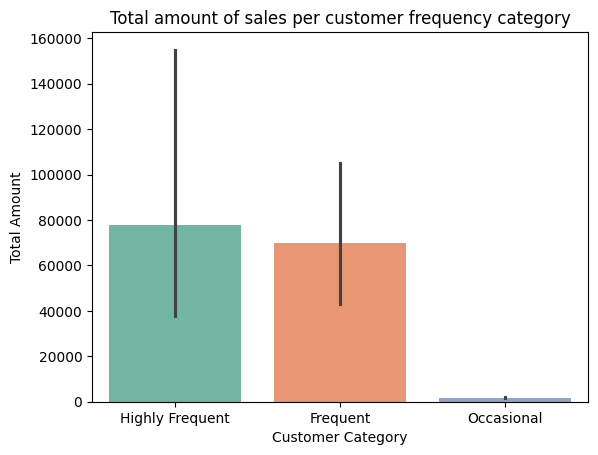

In [66]:
sns.barplot(data = df, x = 'Frequency', y = 'Amount', hue = 'Frequency', palette = 'Set2')
plt.title('Total amount of sales per customer frequency category')
plt.xlabel('Customer Category')
plt.ylabel('Total Amount')
plt.show()

I can see that the high frequent customers have high variablity in the sales compared to frequent and occasional customers.
* This shows that the high frequent customers sales maybe high or maybe low.
* For frequent customers the variability of sales is not that high but is reasonable.
* Occasional customers, as they visit occasionally, the total amount of sales is very low and there is low variability.

In [67]:
df = df.drop(columns=['InvoiceNo', 'Amount'])

In [68]:
final_data = pd.merge(df, data, on='CustomerID', how='inner')
final_data

,CustomerID,Frequency,PurchaseValue,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Time,Month,Day,Year,Amount
0,14911.0,Highly Frequent,High,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,9.95,EIRE,14:05:00,December,Wednesday,2010,39.8
1,14911.0,Highly Frequent,High,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2.95,EIRE,14:05:00,December,Wednesday,2010,17.7
2,14911.0,Highly Frequent,High,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2.55,EIRE,14:05:00,December,Wednesday,2010,15.3
3,14911.0,Highly Frequent,High,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,0.85,EIRE,14:05:00,December,Wednesday,2010,42.5
4,14911.0,Highly Frequent,High,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,2.25,EIRE,14:05:00,December,Wednesday,2010,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401597,12357.0,Occasional,Low,574740,23196,VINTAGE LEAF MAGNETIC NOTEPAD,48,1.25,Switzerland,16:07:00,November,Sunday,2011,60.0
401598,12357.0,Occasional,Low,574740,22348,TEA BAG PLATE RED RETROSPOT,48,0.85,Switzerland,16:07:00,November,Sunday,2011,40.8
401599,12357.0,Occasional,Low,574740,23184,BULL DOG BOTTLE OPENER,36,4.15,Switzerland,16:07:00,November,Sunday,2011,149.4
401600,12357.0,Occasional,Low,574740,23302,KNEELING MAT HOUSEWORK DESIGN,12,1.65,Switzerland,16:07:00,November,Sunday,2011,19.8


Now the dataset is arranged according to the frequenc of the customer buying in the website.
So, this way I can keep in check the high priority customers.

In [69]:
product_sales = data.groupby(['Description', 'StockCode']).sum('Quantity').reset_index()
product_sales.sort_values(by = 'Quantity', ascending= False, inplace =True)
product_sales

,Description,StockCode,Quantity,UnitPrice,Year,Amount
2313,"PAPER CRAFT , LITTLE BIRDIE",23843,161990,4.16,4022,336939.20
1986,MEDIUM CERAMIC TOP STORAGE JAR,23166,152527,378.78,522860,159180.56
2600,POPCORN HOLDER,22197,57369,1520.31,2952020,51701.02
3860,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84077,56151,173.10,1087911,14067.93
1769,JUMBO BAG RED RETROSPOT,85099B,49490,5327.40,4335591,96143.83
...,...,...,...,...,...,...
376,BLACK GLASS/SHELL/PEARL NECKLACE,90181C,1,9.15,2011,9.15
3862,WOVEN BERRIES CUSHION COVER,46776b,1,4.13,2011,4.13
1911,LILY BROOCH WHITE/SILVER COLOUR,90081B,1,4.95,2011,4.95
58,3 WHITE CHOC MORRIS BOXED CANDLES,85034b,1,8.29,2011,8.29


/tmp/ipython-input-1755345813.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = product_sales[:15], x = 'Quantity', y = 'Description', palette = 'Set2')


<Axes: xlabel='Quantity', ylabel='Description'>

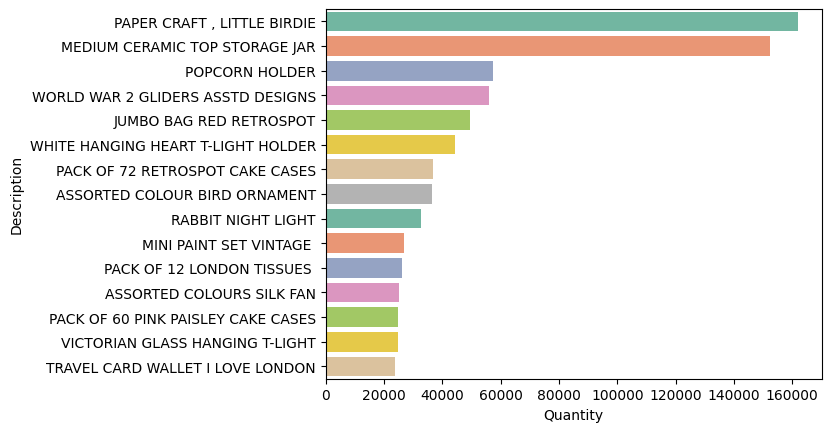

In [70]:
sns.barplot(data = product_sales[:15], x = 'Quantity', y = 'Description', palette = 'Set2')

The top 15 items ordered can be seen from the above plot and hence I can use these visualisation to restore the stock according to the demand.